# Crime Rate Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get data

In [2]:
df = pd.read_csv('files/realestatecrime.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.info() # 511 locations, 13 features and a target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [4]:
df.describe() # some missing values + need to normalize

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


## EDA

<Figure size 1152x1008 with 0 Axes>

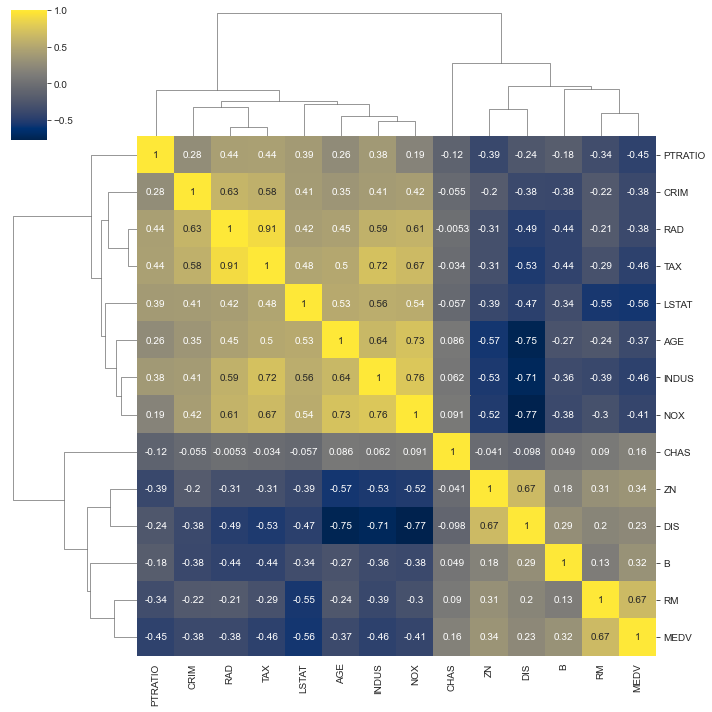

In [5]:
plt.figure(figsize=(16,14))
sns.clustermap(df.corr(),annot=True,cmap='cividis')

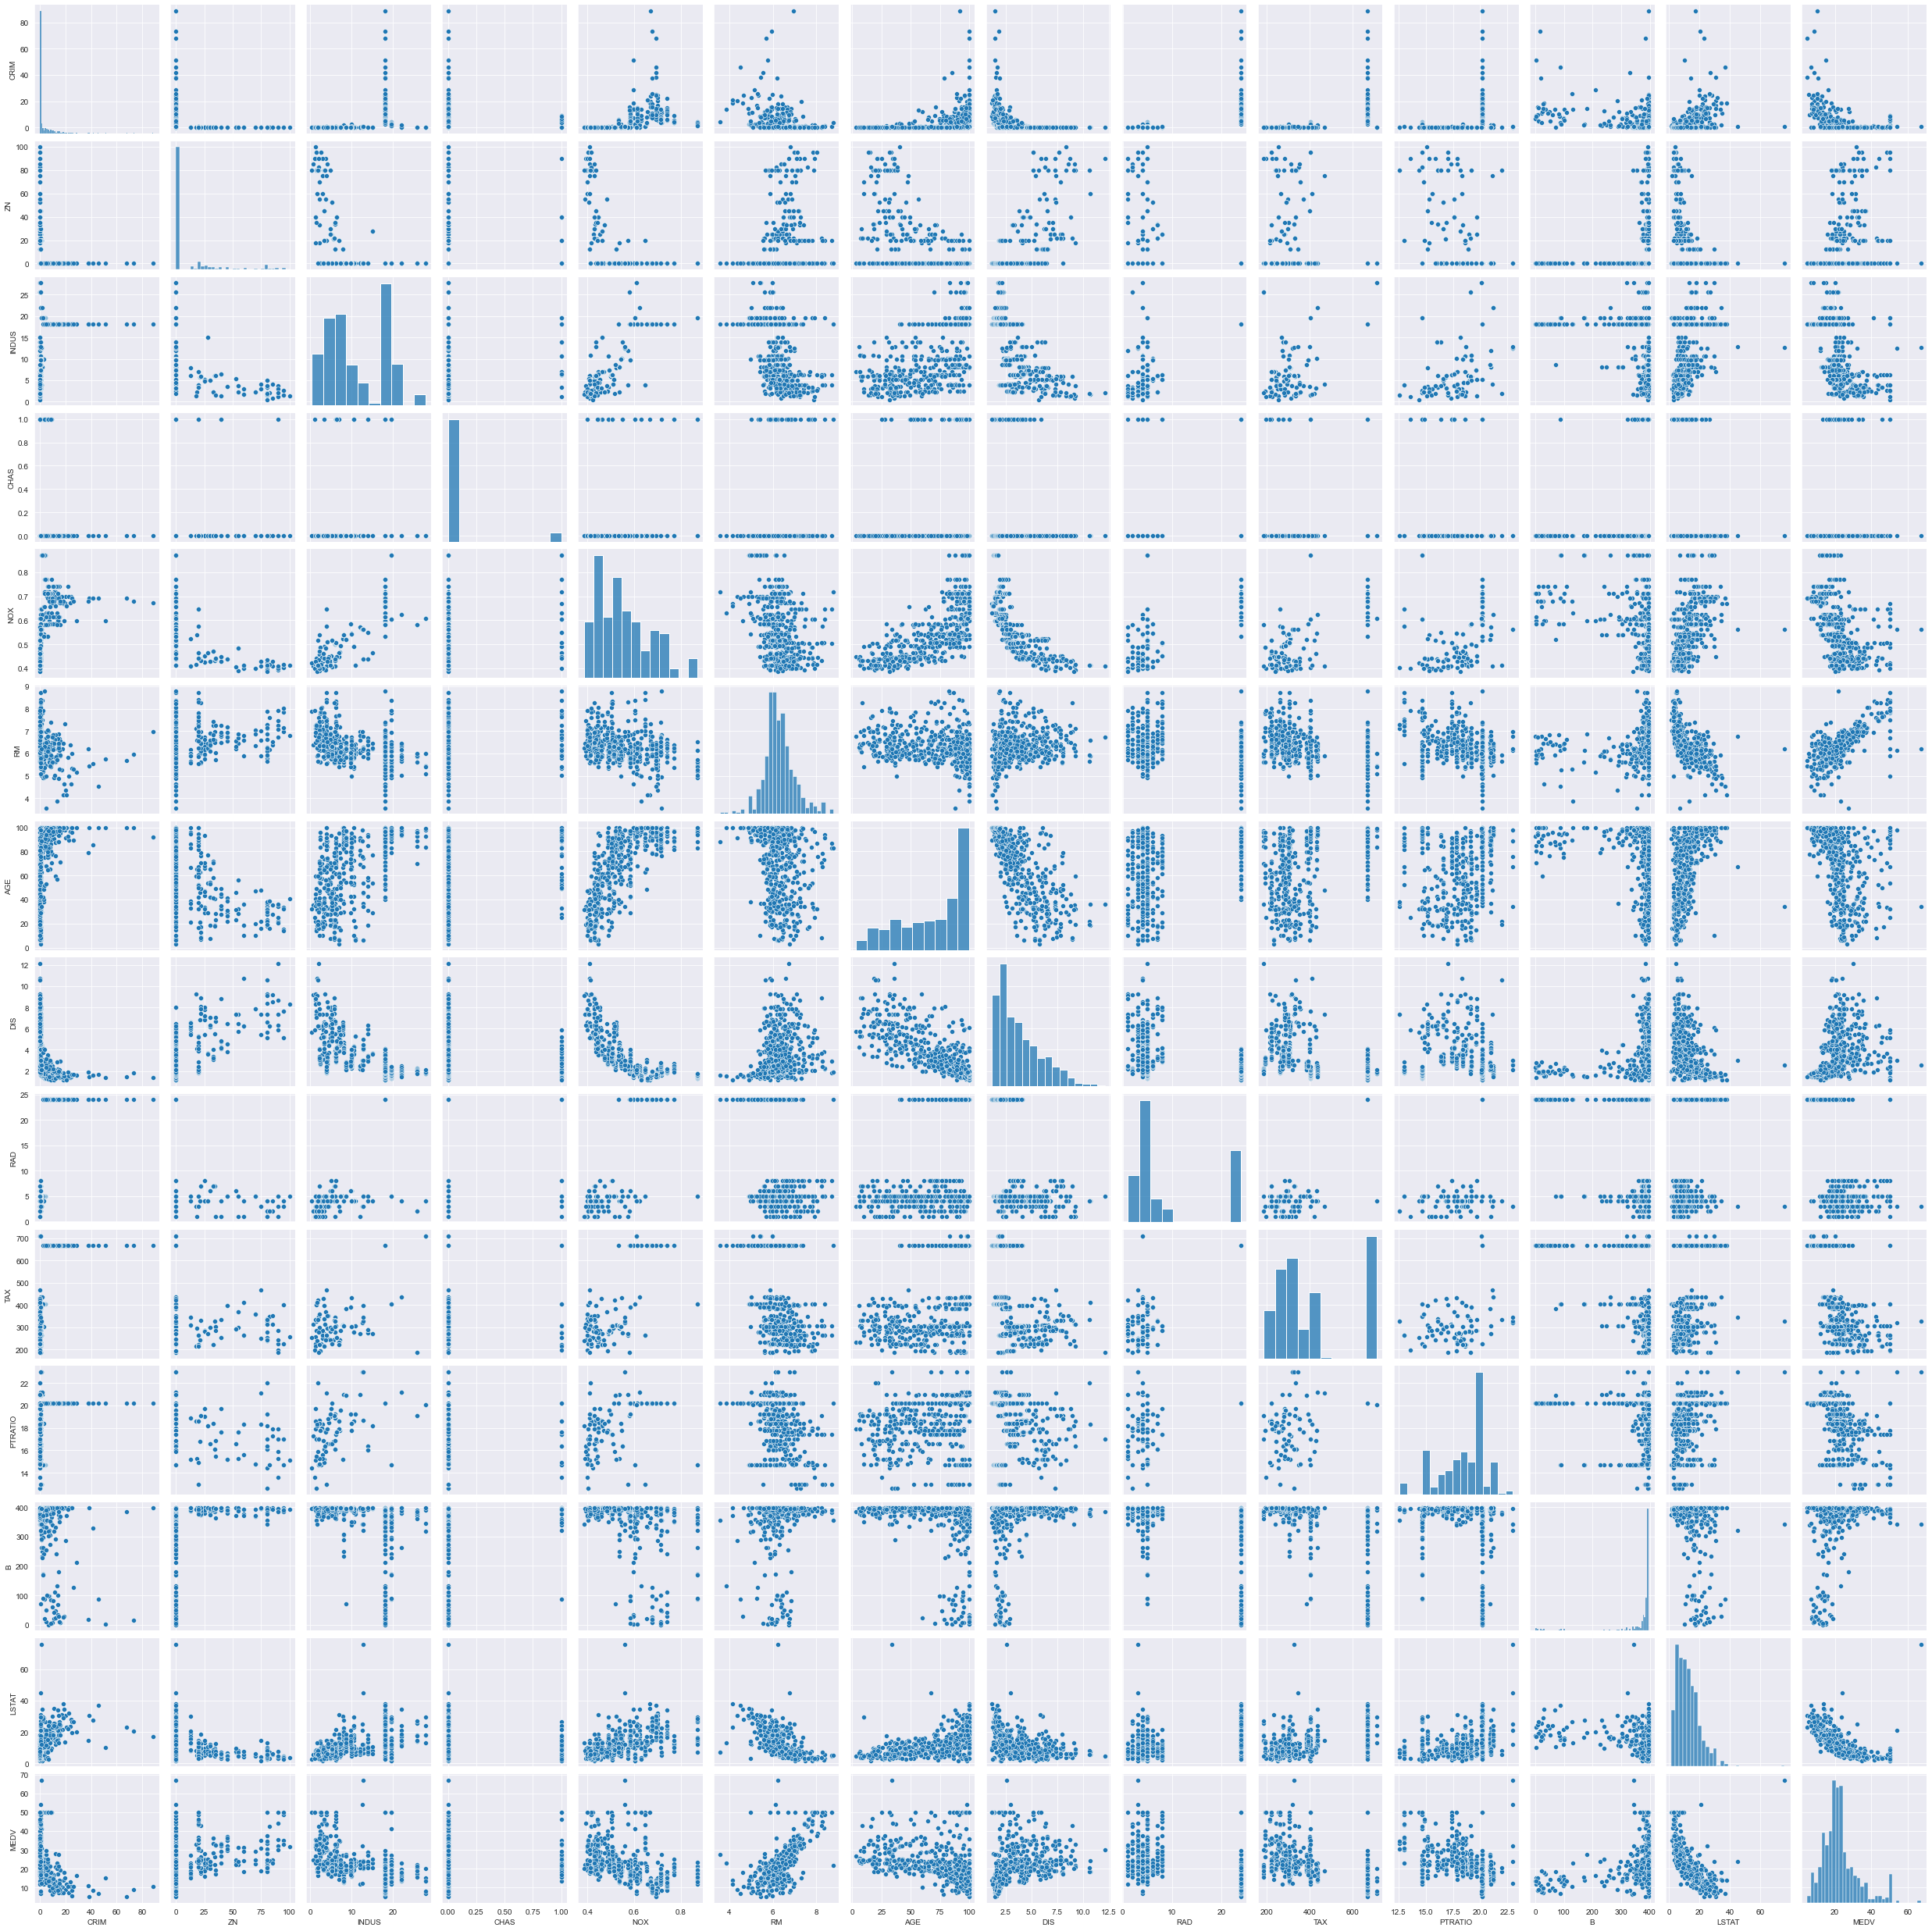

In [6]:
sns.pairplot(df)

## Data Prep

### Fill in missing values

<AxesSubplot:>

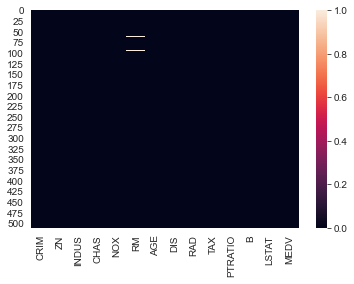

In [7]:
sns.heatmap(df.isnull())

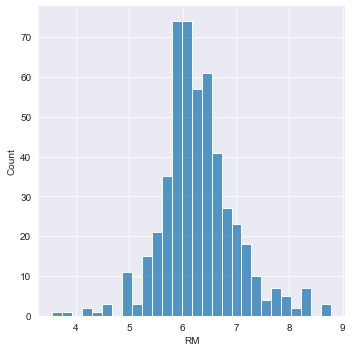

In [8]:
sns.displot(data=df,x='RM') # normal, use mean

In [9]:
df['RM'].fillna(df['RM'].mean(),inplace=True)

<AxesSubplot:>

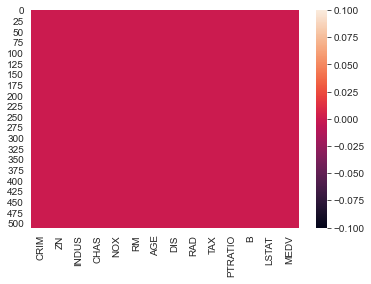

In [10]:
sns.heatmap(df.isnull()) # no more missing values

### Normalize Variables

In [11]:
from sklearn.preprocessing import Normalizer

In [12]:
norm = Normalizer()

In [13]:
clean = norm.fit_transform(df.drop('CRIM',axis=1))

### Split data into train and test

In [14]:
X = pd.DataFrame(clean,columns=df.drop('CRIM',axis=1).columns)
y = df['CRIM']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling

### Linear Regression

#### Build and train model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

#### Make predictions

In [20]:
lr_pred = lr.predict(X_valid)

#### Evaluate model performance

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
print(f'MAE: {mean_absolute_error(y_valid,lr_pred)}')
print(f'MSE: {mean_squared_error(y_valid,lr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,lr_pred))}') # RMSE = 

MAE: 2.289548193009686
MSE: 11.886945784832681
RMSE: 3.4477450289765748


In [23]:
# 96% error
np.sqrt(mean_squared_error(y_valid,lr_pred)) / df['CRIM'].mean() * 100

96.19452358269001

### Polynomial Regression

#### Build and train model

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_tr = PolynomialFeatures(2)

In [26]:
X_poly_tr = poly_tr.fit_transform(X_train)

In [27]:
poly_val = PolynomialFeatures(2)
X_poly_val= poly_val.fit_transform(X_valid)

In [28]:
plr = LinearRegression()

In [29]:
plr.fit(X_poly_tr,y_train)

LinearRegression()

#### Make predictions

In [30]:
plr_pred = plr.predict(X_poly_val)

#### Evaluate model performance

In [31]:
print(f'MAE: {mean_absolute_error(y_valid,plr_pred)}')
print(f'MSE: {mean_squared_error(y_valid,plr_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,plr_pred))}') # RMSE = 

MAE: 3.6435065217391305
MSE: 50.550745838921316
RMSE: 7.109904770031826


In [32]:
# 198% error
np.sqrt(mean_squared_error(y_valid,plr_pred)) / df['CRIM'].mean() * 100

198.37136920607063

### Cubic Polynomial Regression

#### Build and train model

In [33]:
poly_tr_3 = PolynomialFeatures(3)

In [34]:
X_poly_tr3 = poly_tr_3.fit_transform(X_train)

In [35]:
poly_val3 = PolynomialFeatures(3)
X_poly_val3 = poly_val3.fit_transform(X_valid)

In [36]:
plr3 = LinearRegression()

In [37]:
plr3.fit(X_poly_tr3,y_train)

LinearRegression()

#### Make predictions

In [38]:
plr3_pred = plr3.predict(X_poly_val3)

#### Evaluate model performance

In [39]:
print(f'MAE: {mean_absolute_error(y_valid,plr3_pred)}')
print(f'MSE: {mean_squared_error(y_valid,plr3_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,plr3_pred))}') # RMSE = 

MAE: 788.7135489600292
MSE: 11199847.097538378
RMSE: 3346.6172618837636


In [40]:
# 93372% error
np.sqrt(mean_squared_error(y_valid,plr3_pred)) / df['CRIM'].mean() * 100

93372.98739172585

### Decision Tree Regression

#### Build and train model

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor()

In [43]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

#### Make predictions

In [44]:
dt_pred = dt.predict(X_valid)

#### Evaluate model performance

In [45]:
print(f'MAE: {mean_absolute_error(y_valid,dt_pred)}')
print(f'MSE: {mean_squared_error(y_valid,dt_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,dt_pred))}') # RMSE = 

MAE: 1.2591444347826088
MSE: 12.689082273373044
RMSE: 3.5621738129087754


In [46]:
# 99% error
np.sqrt(mean_squared_error(y_valid,dt_pred)) / df['CRIM'].mean() * 100

99.38716754620609

###  Random Forest Regression

#### Build and train model

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor()

#### Make predictions

In [50]:
rf_pred = rf.predict(X_valid)

#### Evaluate model performance

In [51]:
print(f'MAE: {mean_absolute_error(y_valid,rf_pred)}')
print(f'MSE: {mean_squared_error(y_valid,rf_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,rf_pred))}') # RMSE = 

MAE: 1.1677689407826086
MSE: 8.763172378000991
RMSE: 2.960265592476626


In [52]:
# 82% error
np.sqrt(mean_squared_error(y_valid,rf_pred)) / df['CRIM'].mean() * 100

82.59350269618021

### Gradient Boosted Trees

#### Build and train model

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
gb = GradientBoostingRegressor()

In [55]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

#### Make predictions

In [56]:
gb_pred = gb.predict(X_valid)

#### Evaluate model performance

In [57]:
print(f'MAE: {mean_absolute_error(y_valid,gb_pred)}')
print(f'MSE: {mean_squared_error(y_valid,gb_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,gb_pred))}') # RMSE = 

MAE: 1.2914303091068342
MSE: 10.630747118477402
RMSE: 3.260482651154182


In [58]:
# 90% error
np.sqrt(mean_squared_error(y_valid,gb_pred)) / df['CRIM'].mean() * 100

90.96977086223322

### Neural Network
#### Build and train model

In [59]:
from sklearn.neural_network import MLPRegressor

In [60]:
nn = MLPRegressor(max_iter=2000)

In [61]:
nn.fit(X_train,y_train)

MLPRegressor(max_iter=2000)

#### Make predictions

In [62]:
nn_pred = nn.predict(X_valid)

#### Evaluate model performance

In [63]:
print(f'MAE: {mean_absolute_error(y_valid,nn_pred)}')
print(f'MSE: {mean_squared_error(y_valid,nn_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_valid,nn_pred))}') # RMSE = 

MAE: 2.2378808015865
MSE: 14.08761545496929
RMSE: 3.7533472334663216


In [64]:
# 104% error
np.sqrt(mean_squared_error(y_valid,nn_pred)) / df['CRIM'].mean() * 100

104.72104112376157

## Deployment